In [1]:
#importing the libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder ,StandardScaler
from sklearn.compose import  ColumnTransformer
import numpy as np

In [2]:
#loading of the data
data=pd.read_csv("Train.csv")

In [3]:
#gives the First 5 rows
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape

(8523, 12)

### 1.Imputation Of Missing Data

In [5]:
#Check if there are still missing values in the data
missing_data = data.isnull().sum()

In [6]:
print(missing_data)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
#finding the mean of 'Item_Visibility' for entries where it is greater than 0
non_zero_mean = data.loc[data['Item_Visibility'] > 0, 'Item_Visibility'].mean()

In [8]:
#Filling missing Item_Weight values by grouping by Item_Type and using the median 
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Type')['Item_Weight'].transform('median'))

In [9]:
#Filling missing Outlet_Size values by grouping by Item_Type and using the mode 
data['Outlet_Size'] = data['Outlet_Size'].fillna(data.groupby('Item_Type')['Outlet_Size'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [10]:
# Fix inconsistencies in the 'Item_Fat_Content' column by standardizing the labels
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [11]:
# Checking for duplicates and removing them if any
data.drop_duplicates(inplace=True)

In [12]:
#Check if there are still missing values in the data
data_without = data.isnull().sum()

In [13]:
print(data_without)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [14]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###  2. Categorical Variable Encoding
#### Identify Nominal , Numeric and Ordinal Data

In [15]:
# Assuming nominal and ordinal data columns
nominal_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type','Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']  # Categorical without order
ordinal_cols = ['Outlet_Size']  # Categorical with order, e.g., Small < Medium < High
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales', 'Outlet_Establishment_Year']  # Numerical columns

# Display identified nominal and ordinal and numerical columns
print("\nNominal Columns:", nominal_cols)
print("Ordinal Columns:", ordinal_cols)
print("Numerical Columns:", numerical_columns)


Nominal Columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns: ['Outlet_Size']
Numerical Columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']


#### Encoding Techniques

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Convert Item_Identifier and Outlet_Identifier to numeric using Label Encoding
data['Item_Identifier'] = label_encoder.fit_transform(data['Item_Identifier'])
data['Outlet_Identifier'] = label_encoder.fit_transform(data['Outlet_Identifier'])

# Display transformed columns
data[['Item_Identifier', 'Outlet_Identifier']].head()

,Item_Identifier,Outlet_Identifier
0,156,9
1,8,3
2,662,9
3,1121,0
4,1297,1


In [17]:
#finding the unique values for Outlet_Size
data.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [18]:
#defining mappings for Outlet_Size
map_Outlet_Size=['Medium', 'High', 'Small']

In [19]:
#applying Encoding Techniques for Columns
ohe=OneHotEncoder(sparse_output=False)      #Nominal Encoding
ode=OrdinalEncoder(categories=[map_Outlet_Size])  #Ordinal Encoding 

In [20]:
# Define the ColumnTransformer with correct transformers
ct = ColumnTransformer(
    transformers=[
        # Apply OneHotEncoder to categorical columns
        ('ohe', OneHotEncoder(sparse_output=False), 
         [ 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']),
        
        # Apply OrdinalEncoder to ordinal categorical columns
        ('ode', OrdinalEncoder(), ['Outlet_Size']),
    ],
   remainder='passthrough'  # Keep any other columns as they are
)
ct.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(sparse_output=False),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('ode', OrdinalEncoder(), ['Outlet_Size'])])

In [21]:
# applying the transformation
df_encoded = ct.fit_transform(data)
df_encoded.head()

,ohe__Item_Fat_Content_Low Fat,ohe__Item_Fat_Content_Regular,ohe__Item_Type_Baking Goods,ohe__Item_Type_Breads,ohe__Item_Type_Breakfast,ohe__Item_Type_Canned,ohe__Item_Type_Dairy,ohe__Item_Type_Frozen Foods,ohe__Item_Type_Fruits and Vegetables,ohe__Item_Type_Hard Drinks,...,ohe__Outlet_Type_Supermarket Type2,ohe__Outlet_Type_Supermarket Type3,ode__Outlet_Size,remainder__Item_Identifier,remainder__Item_Weight,remainder__Item_Visibility,remainder__Item_MRP,remainder__Outlet_Identifier,remainder__Outlet_Establishment_Year,remainder__Item_Outlet_Sales
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,156,9.30,0.016047,249.8092,9,1999,3735.1380
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,8,5.92,0.019278,48.2692,3,2009,443.4228
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,662,17.50,0.016760,141.6180,9,1999,2097.2700
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1121,19.20,0.000000,182.0950,0,1998,732.3800
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1297,8.93,0.000000,53.8614,1,1987,994.7052


In [22]:
# Renaming columns
new_column_names = {'remainder__Item_Identifier':'Item_Identifier' ,
       'ohe__Item_Fat_Content_Low Fat':'Item_Fat_Content_Low Fat',
       'ohe__Item_Fat_Content_Regular':'Item_Fat_Content_Regular',
       'remainder__Outlet_Identifier':'Outlet_Identifier',
       'ohe__Item_Type_Baking Goods':'Item_Type_Baking Goods', 
       'ohe__Item_Type_Breads':'Item_Type_Breads',
       'ohe__Item_Type_Breakfast':'Item_Type_Breakfast', 
       'ohe__Item_Type_Canned':'Item_Type_Canned',
       'ohe__Item_Type_Dairy':'Item_Type_Dairy',
       'ohe__Item_Type_Frozen Foods':'Item_Type_Frozen Foods',
       'ohe__Item_Type_Fruits and Vegetables':'Item_Type_Fruits and Vegetables',
        'ohe__Item_Type_Hard Drinks':'Item_Type_Hard Drinks',
       'ohe__Item_Type_Health and Hygiene':'Item_Type_Health and Hygiene', 
        'ohe__Item_Type_Household':'Item_Type_Househol',
       'ohe__Item_Type_Meat':'Item_Type_Meat', 
        'ohe__Item_Type_Others':'Item_Type_Others',
       'ohe__Item_Type_Seafood':'Item_Type_Seafood',
        'ohe__Item_Type_Snack Foods':'Item_Type_Snack Foods',
       'ohe__Item_Type_Soft Drinks':'Item_Type_Soft Drink',
       'ohe__Item_Type_Starchy Foods' :'Item_Type_Starchy Foods',
       'ohe__Outlet_Location_Type_Tier 1':'Outlet_Location_Type_Tier 1',
        'ohe__Outlet_Location_Type_Tier 2':'Outlet_Location_Type_Tier 2',
       'ohe__Outlet_Location_Type_Tier 3':'Outlet_Location_Type_Tier 3', 
        'ohe__Outlet_Type_Grocery Store':'Outlet_Type_Grocery Store',
       'ohe__Outlet_Type_Supermarket Type1':'Outlet_Type_Supermarket Type1',
       'ohe__Outlet_Type_Supermarket Type2':'Outlet_Type_Supermarket Type2',
       'ohe__Outlet_Type_Supermarket Type3':'Outlet_Type_Supermarket Type3', 
       'ode__Outlet_Size':'Outlet_Size',
       'remainder__Item_Weight': 'Item_Weight',
       'remainder__Item_Visibility':'Item_Visibility',
       'remainder__Item_Outlet_Sales':'Item_Outlet_Sales',
       'remainder__Item_MRP':'Item_MRP',
       'remainder__Outlet_Establishment_Year':'Outlet_Establishment_Year' ,
       }
# Apply the renaming
df_encoded.rename(columns=new_column_names, inplace=True)

df_encoded.head(5)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,156,9.30,0.016047,249.8092,9,1999,3735.1380
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,8,5.92,0.019278,48.2692,3,2009,443.4228
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,662,17.50,0.016760,141.6180,9,1999,2097.2700
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1121,19.20,0.000000,182.0950,0,1998,732.3800
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1297,8.93,0.000000,53.8614,1,1987,994.7052


### 3. Feature Derivation 

In [23]:
# Creating a new column named Outlet_age for the store's age
df_encoded['Outlet_age'] = 2024 - df_encoded['Outlet_Establishment_Year']


# Display the original columns and the new feature
print(df_encoded[['Outlet_Establishment_Year', 'Outlet_age']].head())

   Outlet_Establishment_Year  Outlet_age
0                       1999          25
1                       2009          15
2                       1999          25
3                       1998          26
4                       1987          37


In [24]:
df_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,156,9.30,0.016047,249.8092,9,1999,3735.1380,25
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,8,5.92,0.019278,48.2692,3,2009,443.4228,15
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,662,17.50,0.016760,141.6180,9,1999,2097.2700,25
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1121,19.20,0.000000,182.0950,0,1998,732.3800,26
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1297,8.93,0.000000,53.8614,1,1987,994.7052,37


### 4. Outlier Treatment

In [25]:
# Continuous numerical features for outlier detection
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Defining Z-score threshold for outlier detection
z_threshold = 2.5  # as 3 results with 0 outliers & 2 with many so fixed T as 2.5 

# Dictionary to store detected outliers
outliers_dict = {}

# Calculating Z-scores and identifing the outliers
for col in continuous_columns:
    df_encoded[col + '_zsr'] = np.abs((df_encoded[col] - df_encoded[col].mean()) / df_encoded[col].std())  # Calculating Z-score with its formula
    outliers_dict[col] = df_encoded[df_encoded[col + '_zsr'] > z_threshold]  # Storing outliers
    print(f"\n{col}: {outliers_dict[col].shape[0]} outliers detected.")
    
     # Apply capping to outliers
    capped_values = df_encoded[col].copy()
    capped_values[df_encoded[col + '_zsr'] > z_threshold] = df_encoded[col].mean() + z_threshold * df_encoded[col].std()  # Capping at the Z-score threshold
    
    # Replace original column with capped values
    df_encoded[col] = capped_values
    print(f"{col}: Capping applied to outliers.")




Item_Weight: 0 outliers detected.
Item_Weight: Capping applied to outliers.

Item_Visibility: 146 outliers detected.
Item_Visibility: Capping applied to outliers.

Item_MRP: 0 outliers detected.
Item_MRP: Capping applied to outliers.

Item_Outlet_Sales: 197 outliers detected.
Item_Outlet_Sales: Capping applied to outliers.


In [26]:
df_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,Item_Weight_zsr,Item_Visibility_zsr,Item_MRP_zsr,Item_Outlet_Sales_zsr
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.016047,249.8092,9,1999,3735.1380,25,0.828359,0.970675,1.747351,0.910548
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019278,48.2692,3,2009,443.4228,15,1.625269,0.908058,1.488936,1.018381
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016760,141.6180,9,1999,2097.2700,25,1.104972,0.956861,0.010040,0.049235
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,182.0950,0,1998,732.3800,26,1.505785,1.281683,0.660011,0.849053
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,53.8614,1,1987,994.7052,37,0.915595,1.281683,1.399138,0.695332


### 5. Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to relevant numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the scaled dataframe
print(df_encoded[numerical_columns].head())

   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0     0.282525         0.082240  0.927507           0.577129   
1     0.081274         0.098799  0.072068           0.063941   
2     0.770765         0.085893  0.468288           0.321781   
3     0.871986         0.000000  0.640093           0.108990   
4     0.260494         0.000000  0.095805           0.149887   

   Outlet_Establishment_Year  
0                   0.583333  
1                   1.000000  
2                   0.583333  
3                   0.541667  
4                   0.083333  


### 6. Target Variable Transformation

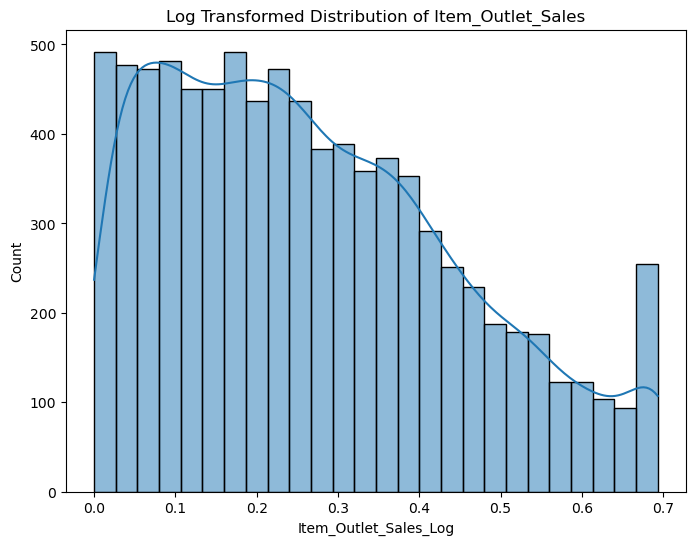

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
#Target Variable Transformation - Apply Log Transformation (if there are no zeros)
df_encoded['Item_Outlet_Sales_Log'] = np.log1p(df_encoded['Item_Outlet_Sales'])  # log1p handles zero values safely

# Plot the transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_encoded['Item_Outlet_Sales_Log'], kde=True)
#sns.histplot(df_encoded['Item_Visibility_Log'], kde=True)
plt.title('Log Transformed Distribution of Item_Outlet_Sales')
plt.show()

In [29]:
#printing the datatype of an Each Column
df_encoded.dtypes

Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Househol                 float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drink               float64
Item_Type_Starchy Foods            float64
Outlet_Location_Type_Tier 1        float64
Outlet_Location_Type_Tier 2        float64
Outlet_Location_Type_Tier 3        float64
Outlet_Type_Grocery Store          float64
Outlet_Type_Supermarket Type1      float64
Outlet_Type

In [30]:
df_encoded.shape

(8523, 39)

In [31]:
df_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,Item_Weight_zsr,Item_Visibility_zsr,Item_MRP_zsr,Item_Outlet_Sales_zsr,Item_Outlet_Sales_Log
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.927507,9,0.583333,0.577129,25,0.828359,0.970675,1.747351,0.910548,0.455606
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.072068,3,1.000000,0.063941,15,1.625269,0.908058,1.488936,1.018381,0.061980
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.468288,9,0.583333,0.321781,25,1.104972,0.956861,0.010040,0.049235,0.278980
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.640093,0,0.541667,0.108990,26,1.505785,1.281683,0.660011,0.849053,0.103450
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.095805,1,0.083333,0.149887,37,0.915595,1.281683,1.399138,0.695332,0.139664


In [32]:
# Save the cleaned dataset
df_encoded.to_csv('processed_train.csv', index=False)